1.Data Exploration and manipulation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

# 1. Data Exploration and Manipulation
# Load dataset (adjust the filename as needed)
df= pd.read_csv(r"C:\Users\janos\Documents\Th Studium WIW\Auslandssemester\Fächer\Business Analytics\Assignments\salaries.csv")

print(df.shape)
# Dataset Overview
print("Dataset Head:\n", df.head())
print("\nDataset Description:\n", df.describe())

# Identify target variable
target = "salary"  # Replace with actual target column name

(397, 6)
Dataset Head:
        rank discipline  yrs.since.phd  yrs.service   sex  salary
0      Prof          B             19           18  Male  139750
1      Prof          B             20           16  Male  173200
2  AsstProf          B              4            3  Male   79750
3      Prof          B             45           39  Male  115000
4      Prof          B             40           41  Male  141500

Dataset Description:
        yrs.since.phd  yrs.service         salary
count     397.000000   397.000000     397.000000
mean       22.314861    17.614610  113706.458438
std        12.887003    13.006024   30289.038695
min         1.000000     0.000000   57800.000000
25%        12.000000     7.000000   91000.000000
50%        21.000000    16.000000  107300.000000
75%        32.000000    27.000000  134185.000000
max        56.000000    60.000000  231545.000000


In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)




Missing Values:
 rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64


In [3]:
# Handle missing values is not necessary

In [4]:
# Convert categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


Text(0.5, 1.0, 'Correlation Matrix')

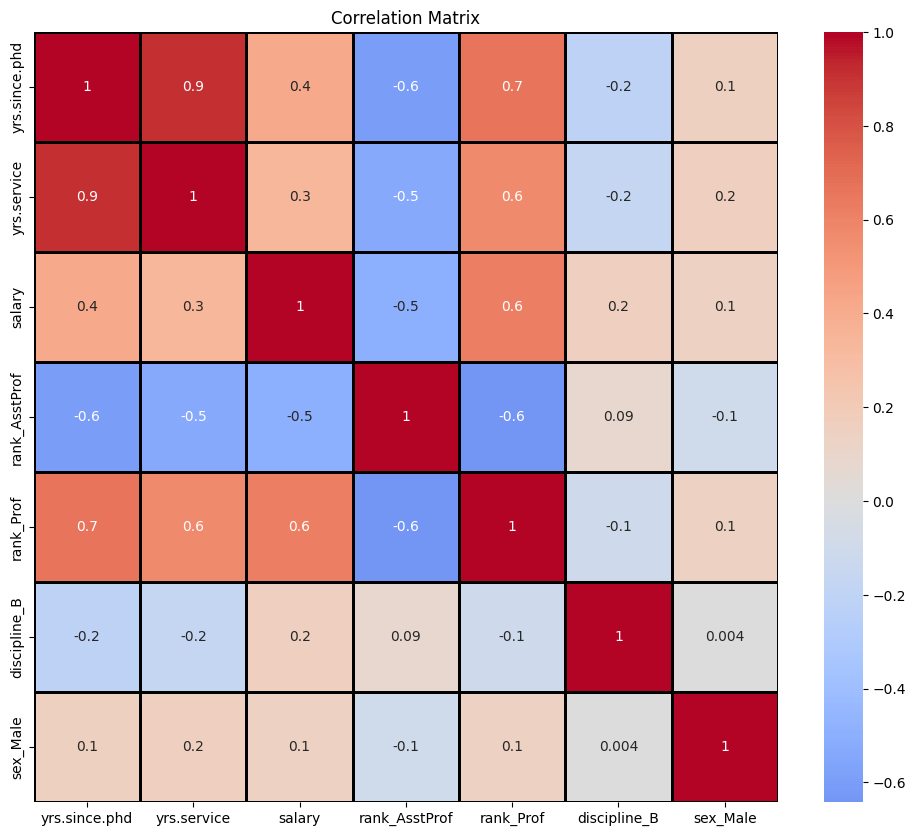

In [5]:
# Correlation analysis
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm",
            fmt = '.1g',
            center = 0,
            linewidths = 1,
            linecolor = 'black')
plt.title("Correlation Matrix")

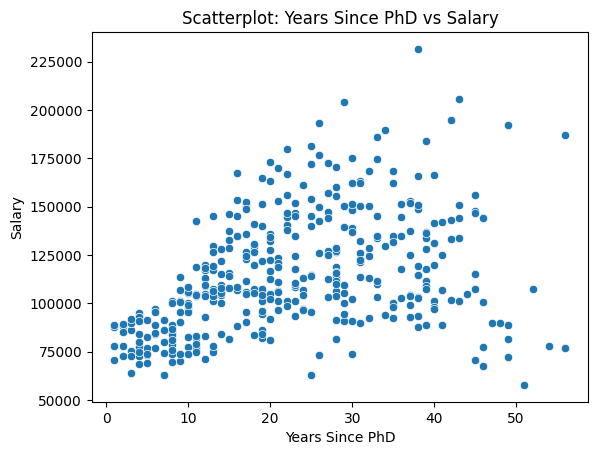

In [6]:
# Scatterplot für yrs.since.phd vs. salary
sns.scatterplot(data=df, x="yrs.since.phd", y="salary")
plt.title("Scatterplot: Years Since PhD vs Salary")
plt.xlabel("Years Since PhD")
plt.ylabel("Salary")
plt.show()


#INTERPRETATION
The plot shows clear, that the salary increases proportional with the years since PhD. A low salary in the beginning of work and over the years more salary because of work improvement and achievements

In [7]:
# Additional visualization to decide which plot I want ro create
#sns.pairplot(df)
#plt.show()

2. Multilinear Regression

In [56]:
# 2. Multilinear Regression Model
# Preprocessing
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Model creation and summary
lin_model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()


In [58]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     50.04
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           7.69e-43
Time:                        14:41:40   Log-Likelihood:                -3619.2
No. Observations:                 317   AIC:                             7252.
Df Residuals:                     310   BIC:                             7279.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.141e+05   1248.592     91.403      0.0

In [59]:
# Make predictions and evaluate
y_pred = lin_model.predict(sm.add_constant(X_test_scaled))
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Multilinear Regression - MAE: {mae}, RMSE: {rmse}")

Multilinear Regression - MAE: 16703.47743313775, RMSE: 24181.920660962085


In [60]:
print("Spalten im DataFrame:", df.columns.tolist())


Spalten im DataFrame: ['yrs.since.phd', 'yrs.service', 'salary', 'rank_AsstProf', 'rank_Prof', 'discipline_B', 'sex_Male']


In [66]:
# Signifikante Features basierend auf p-Wert < 0.05
significant_features = lin_model.pvalues[lin_model.pvalues < 0.05].index
significant_features = significant_features.drop("const", errors="ignore")
print("Statistically Significant Features:", significant_features)




Statistically Significant Features: Index(['x3', 'x4', 'x5'], dtype='object')


In [68]:
# Neues Dataset mit signifikanten Features
X_train_significant = X_train[significant_features]
X_test_significant = X_test[significant_features]

# Neues Modell mit signifikanten Features
lin_model_significant = sm.OLS(y_train, sm.add_constant(X_train_significant)).fit()
print("\nRefined Model Summary:\n", lin_model_significant.summary())

# Evaluation des neuen Modells
y_pred_significant = lin_model_significant.predict(sm.add_constant(X_test_significant))
mae_significant = mean_absolute_error(y_test, y_pred_significant)
rmse_significant = np.sqrt(mean_squared_error(y_test, y_pred_significant))

print(f"Refined Model Performance:\nMAE: {mae_significant:.2f}, RMSE: {rmse_significant:.2f}")

KeyError: "None of [Index(['x3', 'x4', 'x5'], dtype='object')] are in the [columns]"

In [69]:
# 3. Tree Regression Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# Evaluate Tree Regression
tree_mae = mean_absolute_error(y_test, tree_pred)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_pred))
print(f"Tree Regression - MAE: {tree_mae}, RMSE: {tree_rmse}")

# Feature importance
feature_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

Tree Regression - MAE: 20060.5875, RMSE: 27881.255254987176
Feature Importances:
 rank_Prof        0.444728
yrs.since.phd    0.240701
yrs.service      0.219612
discipline_B     0.060023
rank_AsstProf    0.019945
sex_Male         0.014990
dtype: float64


In [70]:
# 1. Auswahl der wichtigsten Features (Schwelle für die Feature Importance setzen)
important_features = feature_importances[feature_importances > 0.05].index  # Auswahl der Features mit Importance > 0.05

# 2. Erstelle ein neues Dataset mit nur den wichtigsten Features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# 3. Trainiere das neue Tree Regression Modell mit den wichtigsten Features
tree_model_refined = DecisionTreeRegressor(random_state=42)
tree_model_refined.fit(X_train_important, y_train)

# 4. Vorhersagen mit dem neuen Modell
tree_pred_refined = tree_model_refined.predict(X_test_important)

# 5. Evaluierung des verfeinerten Modells
tree_mae_refined = mean_absolute_error(y_test, tree_pred_refined)
tree_rmse_refined = np.sqrt(mean_squared_error(y_test, tree_pred_refined))

print(f"Refined Tree Regression - MAE: {tree_mae_refined}, RMSE: {tree_rmse_refined}")


Refined Tree Regression - MAE: 19045.014583333334, RMSE: 27168.85323207773


In [31]:
# 4. Random Forest Model (Extra Mile)
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

# Evaluate Random Forest
forest_mae = mean_absolute_error(y_test, forest_pred)
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
print(f"Random Forest - MAE: {forest_mae}, RMSE: {forest_rmse}")

# Comparison
print(f"\nModel Comparison:\n"
      f"Multilinear Regression: MAE = {mae}, RMSE = {rmse}\n"
      f"Tree Regression: MAE = {tree_mae}, RMSE = {tree_rmse}\n"
      f"Random Forest: MAE = {forest_mae}, RMSE = {forest_rmse}")

Random Forest - MAE: 17258.789347767855, RMSE: 23438.488061209762

Model Comparison:
Multilinear Regression: MAE = 16703.47743313775, RMSE = 24181.920660962085
Tree Regression: MAE = 20060.5875, RMSE = 27881.255254987176
Random Forest: MAE = 17258.789347767855, RMSE = 23438.488061209762


    Multilinear Regression achieves the lowest MAE (16,703.48), indicating the most accurate average predictions compared to the other models. However, it has the highest RMSE, suggesting larger errors in some individual predictions.
    The Random Forest model provides solid results with a moderate MAE of 17,258.79 and RMSE of 23,438.49. It shows better robustness against outliers and offers a good balance between accuracy and error.
    The Tree Regression performs the worst in both metrics, indicating that this model is less accurate and makes larger prediction errors.

Conclusion:

Multilinear Regression is the best model in terms of average error, while Random Forest is a good choice for more accurate predictions that are less influenced by outliers. The Tree Regression model is less effective in this case.
